In [ ]:
pip install ucimlrepo

In [ ]:
# prompt: do one hot encoding for the Sex Feature

from ucimlrepo import fetch_ucirepo
!pip install ucimlrepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
#print(abalone.metadata)

# variable information
#print(abalone.variables)

#X.head()
#y.head()
#y.describe()

#print(y['Rings'].nunique())

import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create the OneHotEncoder object
enc = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder on the 'Sex' column
enc.fit(X[['Sex']])

# Transform the 'Sex' column into one-hot encoded features
encoded_sex = enc.transform(X[['Sex']]).toarray()

# Create a new DataFrame from the encoded features
encoded_df = pd.DataFrame(encoded_sex, columns=enc.get_feature_names_out(['Sex']))

# Concatenate the encoded features with the original DataFrame (excluding the original 'Sex' column)
X_encoded = pd.concat([X.drop('Sex', axis=1), encoded_df], axis=1)

# Now X_encoded contains the one-hot encoded 'Sex' feature
print(X_encoded.head())


   Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
0   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Shell_weight  Sex_F  Sex_I  Sex_M  
0         0.150    0.0    0.0    1.0  
1         0.070    0.0    0.0    1.0  
2         0.210    1.0    0.0    0.0  
3         0.155    0.0    0.0    1.0  
4         0.055    0.0    1.0    0.0  


In [ ]:
X_encoded.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0


In [ ]:
df = pd.concat([X_encoded, y], axis=1)

In [ ]:
import numpy as np
import pandas as pd

df = df[(np.abs(df - df.mean()) <= 3 * df.std()).all(axis=1)]

In [ ]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,0.310156,0.328284,0.361559,9.738763
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,0.462615,0.469647,0.480512,2.864691
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,0.000000,0.000000,0.000000,3.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,0.000000,0.000000,0.000000,8.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,0.000000,0.000000,0.000000,9.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,1.000000,1.000000,1.000000,11.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,1.000000,1.000000,1.000000,19.000000


In [ ]:
df.head()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Sex_F,Sex_I,Sex_M,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,0.0,0.0,1.0,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0.0,0.0,1.0,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1.0,0.0,0.0,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0,7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4027 entries, 0 to 4176
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4027 non-null   float64
 1   Diameter        4027 non-null   float64
 2   Height          4027 non-null   float64
 3   Whole_weight    4027 non-null   float64
 4   Shucked_weight  4027 non-null   float64
 5   Viscera_weight  4027 non-null   float64
 6   Shell_weight    4027 non-null   float64
 7   Sex_F           4027 non-null   float64
 8   Sex_I           4027 non-null   float64
 9   Sex_M           4027 non-null   float64
 10  Rings           4027 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 377.5 KB


In [ ]:
df.isnull().sum()

,0
Length,0
Diameter,0
Height,0
Whole_weight,0
Shucked_weight,0
Viscera_weight,0
Shell_weight,0
Sex_F,0
Sex_I,0
Sex_M,0


In [ ]:
# Import required libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

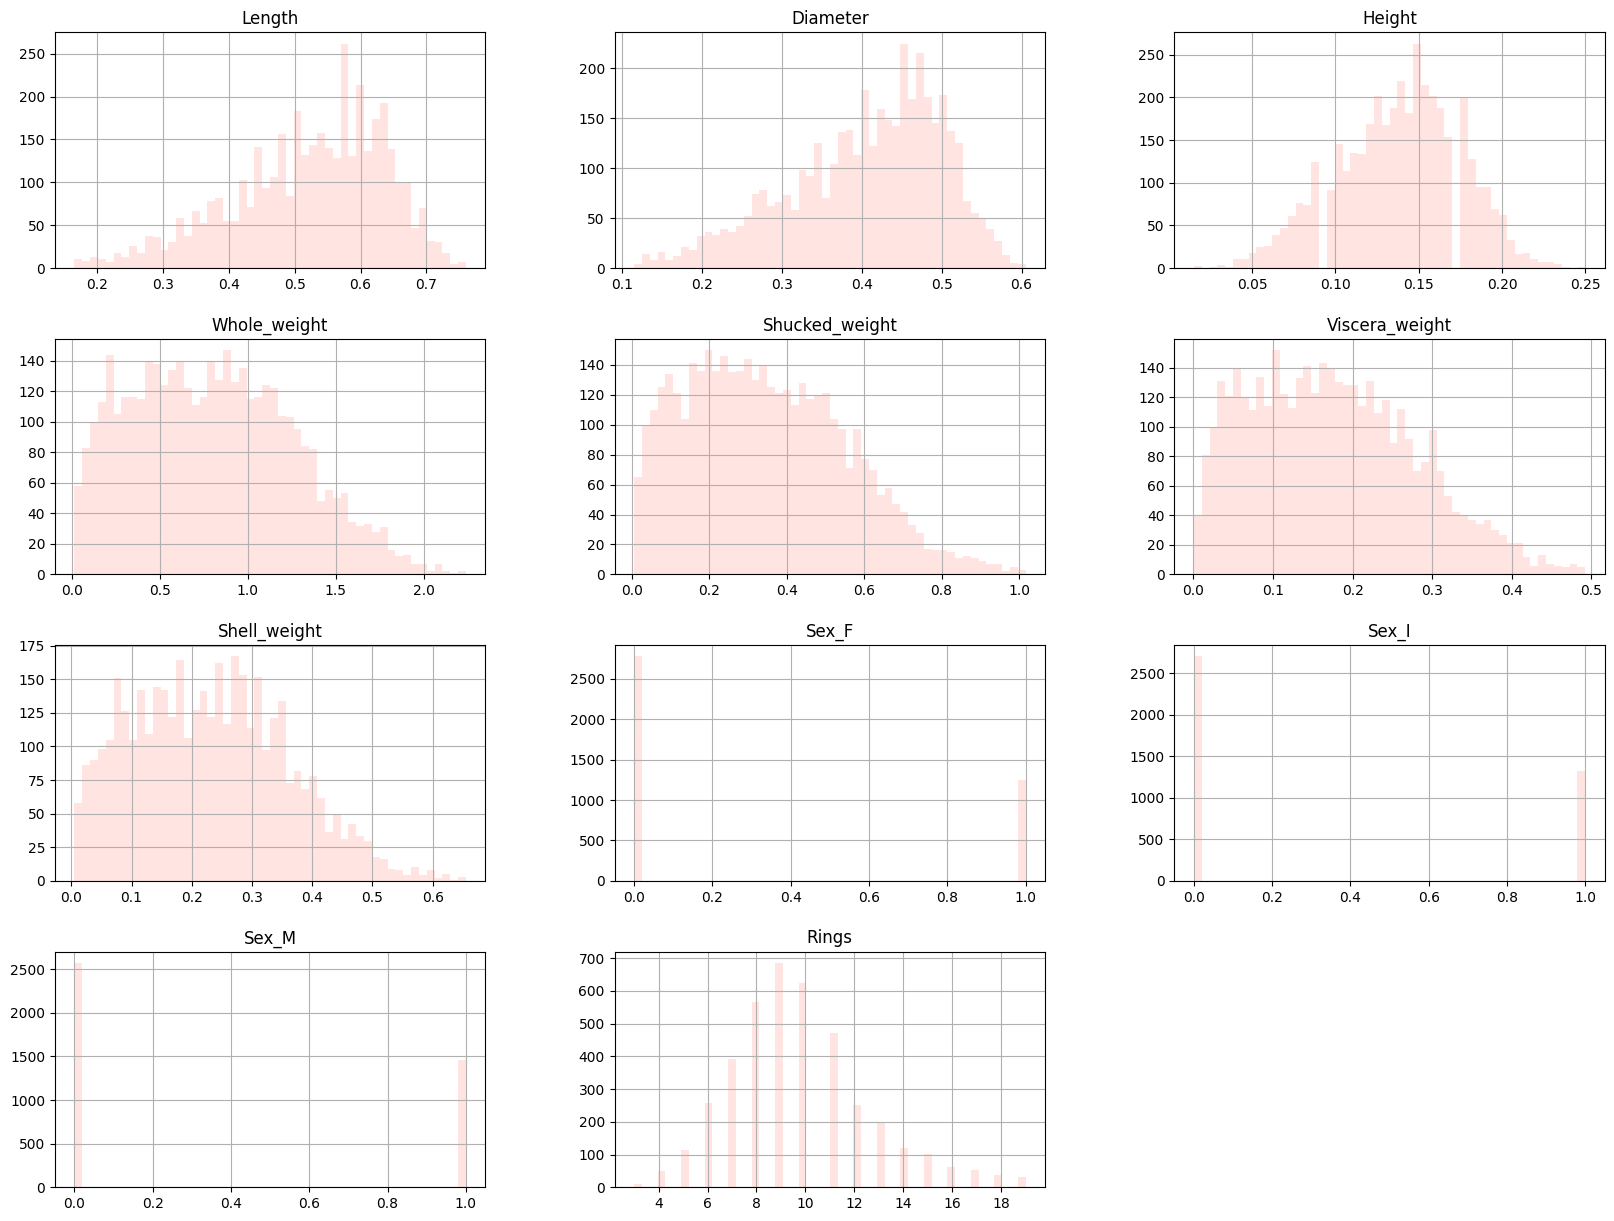

In [ ]:
# Visualize the data
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(20,15), color = "mistyrose")
plt.show()

In [ ]:
#X is your features
#y is your target col

# X = df.iloc[:, :-1]  # All columns except the last
# y = df.iloc[:, -1]   # Only the last column

In [ ]:
# import library
from sklearn.model_selection import train_test_split

Stratified Sampling

In [ ]:
#Spliting data into 80% for training and 20% for testing sets with stratified sampling

X = df.drop('Rings', axis=1)
y = df['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, stratify=y, random_state=42)

print("\nX_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())

print("\nX_train:\n", X_train.shape)
print("\nX_test:\n", X_test.shape)
print("\ny_train:\n", y_train.shape)
print("\ny_test:\n", y_test.shape)


X_train:
       Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
2133   0.440     0.350   0.110        0.4585           0.200          0.0885   
3426   0.710     0.550   0.200        1.9045           0.882          0.4400   
3749   0.430     0.330   0.095        0.3200           0.118          0.0650   
1938   0.625     0.505   0.185        1.1565           0.520          0.2405   
1452   0.470     0.345   0.140        0.4615           0.229          0.1105   

      Shell_weight  Sex_F  Sex_I  Sex_M  
2133        0.1300    0.0    0.0    1.0  
3426        0.5000    0.0    0.0    1.0  
3749        0.1230    0.0    1.0    0.0  
1938        0.3535    0.0    0.0    1.0  
1452        0.1160    0.0    1.0    0.0  

X_test:
       Length  Diameter  Height  Whole_weight  Shucked_weight  Viscera_weight  \
740    0.530     0.440   0.205        0.8350          0.3200          0.2175   
3203   0.635     0.505   0.185        1.3035          0.5010          0.2950   
60    

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from ucimlrepo import fetch_ucirepo

## Random Forest

In [ ]:
# Initialize variables to track the best model performance
best_r2 = -np.inf  # Start with a very low value
best_n_estimators = None
r2_scores = {}  # Dictionary to store R2 for each n_estimators

# Loop over estimator counts from 1 to 100
for n in range(1, 101):
    # Create the model with the current number of estimators
    rf_model = RandomForestRegressor(random_state=42, n_estimators=n)

    # Train the model
    rf_model.fit(X_train, y_train)

    # Make predictions on the test set
    rf_predictions = rf_model.predict(X_test)

    # Evaluate the model using R-squared
    current_r2 = r2_score(y_test, rf_predictions)
    r2_scores[n] = current_r2

    # Print the result for the current number of estimators
    print(f"n_estimators: {n}  -->  R-squared: {current_r2:.4f}")

    # Update the best model if the current one is better
    if current_r2 > best_r2:
        best_r2 = current_r2
        best_n_estimators = n

# Print the best n_estimators value and its corresponding R-squared
print("\nBest Model Performance:")
print(f"n_estimators = {best_n_estimators} achieved the highest R-squared: {best_r2:.4f}")



n_estimators: 1  -->  R-squared: 0.0684
n_estimators: 2  -->  R-squared: 0.3023
n_estimators: 3  -->  R-squared: 0.3846
n_estimators: 4  -->  R-squared: 0.4328
n_estimators: 5  -->  R-squared: 0.4653
n_estimators: 6  -->  R-squared: 0.4773
n_estimators: 7  -->  R-squared: 0.4865
n_estimators: 8  -->  R-squared: 0.4998
n_estimators: 9  -->  R-squared: 0.5059
n_estimators: 10  -->  R-squared: 0.5048
n_estimators: 11  -->  R-squared: 0.5076
n_estimators: 12  -->  R-squared: 0.5115
n_estimators: 13  -->  R-squared: 0.5116
n_estimators: 14  -->  R-squared: 0.5106
n_estimators: 15  -->  R-squared: 0.5085
n_estimators: 16  -->  R-squared: 0.5105
n_estimators: 17  -->  R-squared: 0.5062
n_estimators: 18  -->  R-squared: 0.5032
n_estimators: 19  -->  R-squared: 0.5041
n_estimators: 20  -->  R-squared: 0.5051
n_estimators: 21  -->  R-squared: 0.5051
n_estimators: 22  -->  R-squared: 0.5052
n_estimators: 23  -->  R-squared: 0.5027
n_estimators: 24  -->  R-squared: 0.5011
n_estimators: 25  -->  R-

In [ ]:
# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42, n_estimators=best_n_estimators)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, rf_predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.4287431889693278
Mean Squared Error (MSE): 3.9250511692648424
Root Mean Squared Error (RMSE): 1.9811741895312593
R-squared (R2): 0.5211116287872776


## Evaluate Outcome

Waiting to compare with other models

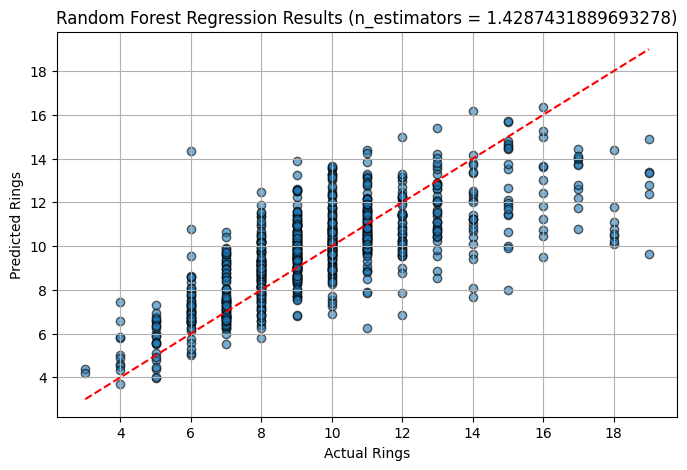

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, rf_predictions, alpha=0.6, edgecolors='k')
plt.xlabel('Actual Rings')
plt.ylabel('Predicted Rings')
plt.title(f'Random Forest Regression Results (n_estimators = {mae})')
# Plot a perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.grid()
plt.show()


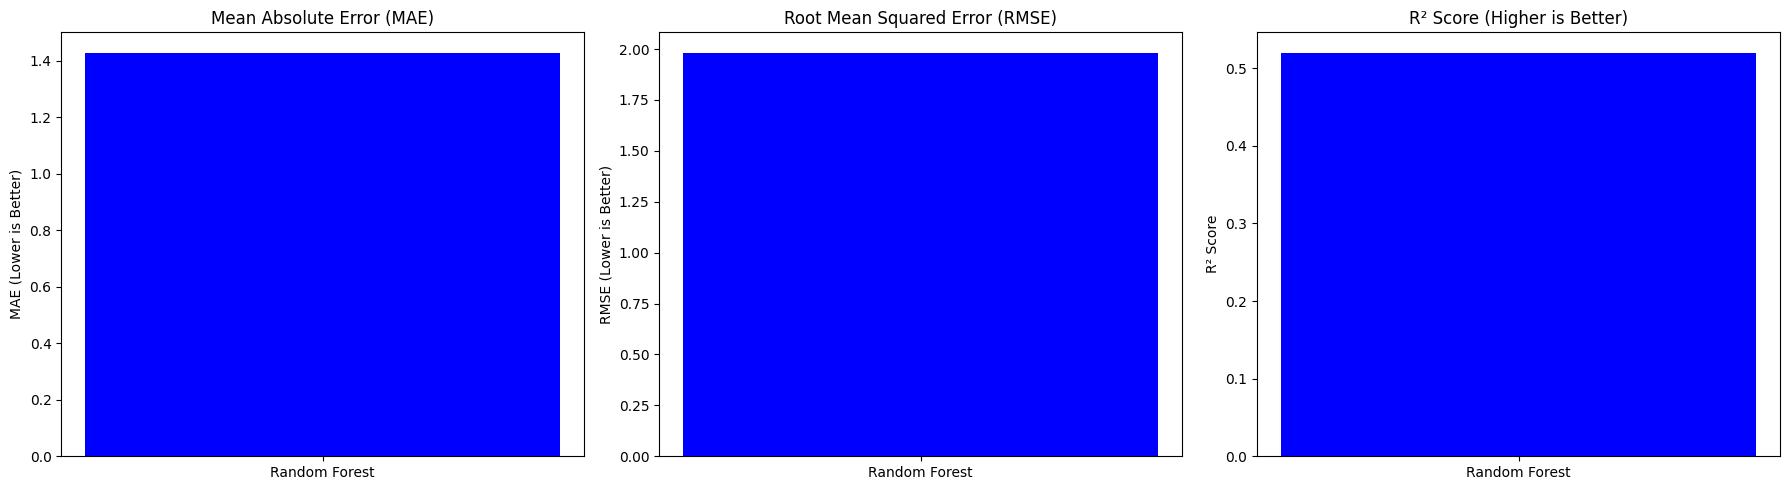

In [ ]:
import matplotlib.pyplot as plt

# Define models and evaluation metrics
models = ['Random Forest']
mae_values = [mae]
rmse_values = [rmse]
r2_values = [r2]

# Set figure size
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot MAE
axes[0].bar(models, mae_values, color=['blue'])
axes[0].set_title('Mean Absolute Error (MAE)')
axes[0].set_ylabel('MAE (Lower is Better)')

# Plot RMSE
axes[1].bar(models, rmse_values, color=['blue'])
axes[1].set_title('Root Mean Squared Error (RMSE)')
axes[1].set_ylabel('RMSE (Lower is Better)')

# Plot R² Score
axes[2].bar(models, r2_values, color=['blue'])
axes[2].set_title('R² Score (Higher is Better)')
axes[2].set_ylabel('R² Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
# Print evaluation summary
print("Regression Model Evaluation Summary:")
print("====================================")
print(f"Random Forest Model:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print("------------------------------------")

Regression Model Evaluation Summary:
Random Forest Model:
MAE: 1.4287
RMSE: 1.9812
R² Score: 0.5211
------------------------------------
